### Jupyter Data Science Workflow

#### From exploratory analysis to reproduciable science

##### Jake VanderPlas : https://github.com/jakevdp/JupyterWorkflow

#### 데이터 가져오기

1. "Fremont Bridge Hourly Bicycle Counts by Month October 2012 to present" 프리몬트 대교의 시간별 자전거 통행량
2. 해당 페이지의 url 카피, 등록

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
# 해당 주소에 데이터가 있는지 확인하기 위하여 필요한 모듈을 임포트하고 확인
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x27be73437b8>)

In [3]:
# 분석을 위하여 파일을 'data' 테이블로 읽어들이고 내용을 확인 함
import pandas as pd
data = pd.read_csv('Fremont.csv')
# data.shape # rows(48864), cols(3) 확인
data.head() # 상위 5개(0~4) 리스팅, 데이터의 저장형태와 칼럼명을 확인할 수 있음

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,10/03/2012 12:00:00 AM,4.0,9.0
1,10/03/2012 01:00:00 AM,4.0,6.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,2.0,3.0
4,10/03/2012 04:00:00 AM,6.0,1.0


In [4]:
data = pd.read_csv('Fremont.csv', index_col = 'Date')#자동으로 부여된 index를 date로 칼럼으로 변경
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
10/03/2012 12:00:00 AM,4.0,9.0
10/03/2012 01:00:00 AM,4.0,6.0
10/03/2012 02:00:00 AM,1.0,1.0
10/03/2012 03:00:00 AM,2.0,3.0
10/03/2012 04:00:00 AM,6.0,1.0


In [5]:
# date의 표시 형식 변경
data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates = True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


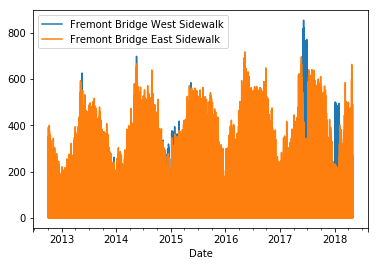

In [6]:
# 분석을 위한 그래프를 그리기 위하여 모듈 임포트, 노트북에 표시될 수 있도록 선언
%matplotlib inline
data.plot() #데이터 전구간(일별)을 그래프로 표시

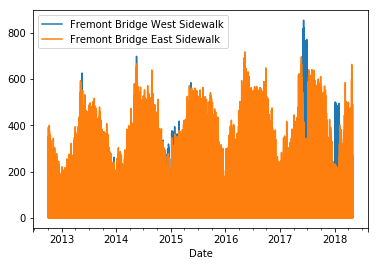

In [7]:
data.plot(); # ';' 메시지 제거

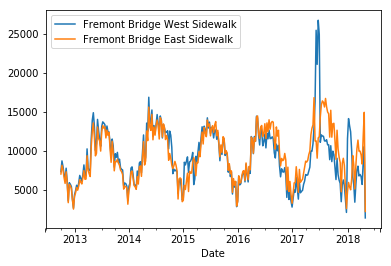

In [8]:
# 데이터 구간을 주간(W)으로 변경하여 그래프, M == 월, Y = 년
data.resample('W').sum().plot();